In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Use some images to generate histograms ###

... starting with grey scale images and moving on to color images

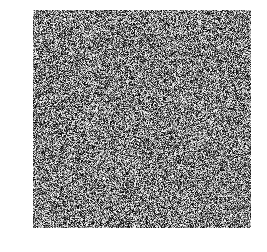

In [13]:
# creating an image with random greavalues
rndMat = np.random.randint(0, 255, (250,250), dtype=np.uint8)
plt.imshow(rndMat, cmap='gray')
plt.axis('off');

### Histogram ###

use calcHist from openCV 

In [14]:
# signature
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) → hist
hist = cv.calcHist([rndMat], [0], None, [255], [0,255])

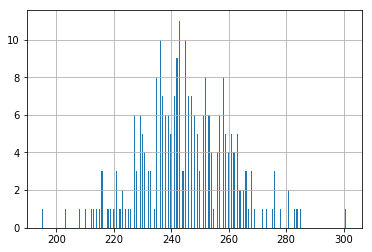

In [15]:
plt.hist(hist, 256)
plt.axis('on')
plt.grid(True)

### now with a color image ###

steps required:

1. reading image 

2. converting to RGB

3. displaying

4. calculating histograms of each channel

In [16]:
# reading image
imgFile = r"C:\Users\micha\projekte\python\iPyNotebooks\ComputerVision\img\IMG_1497.jpg"
imgFile = r"C:\Users\micha\projekte\python\iPyNotebooks\ComputerVision\img\IMG_1675.jpg"
# signature: cv2.imread(filename[, flags]) → retval
# load image with 3 color channels
# note: colors are in order: RBG instead of RGB
imgBGR = cv.imread(imgFile, 1)
# converting to RGB using cvtColor
# signature: cv2.cvtColor(src, code[, dst[, dstCn]]) → dst
imgRGB = cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB)
imgGrey = cv.cvtColor(imgBGR, cv.COLOR_BGR2GRAY)
print("size of  imgRGB: ", imgRGB.shape)
print("dtype of imgRGB: ", imgRGB.dtype)

size of  imgRGB:  (1600, 1200, 3)
dtype of imgRGB:  uint8


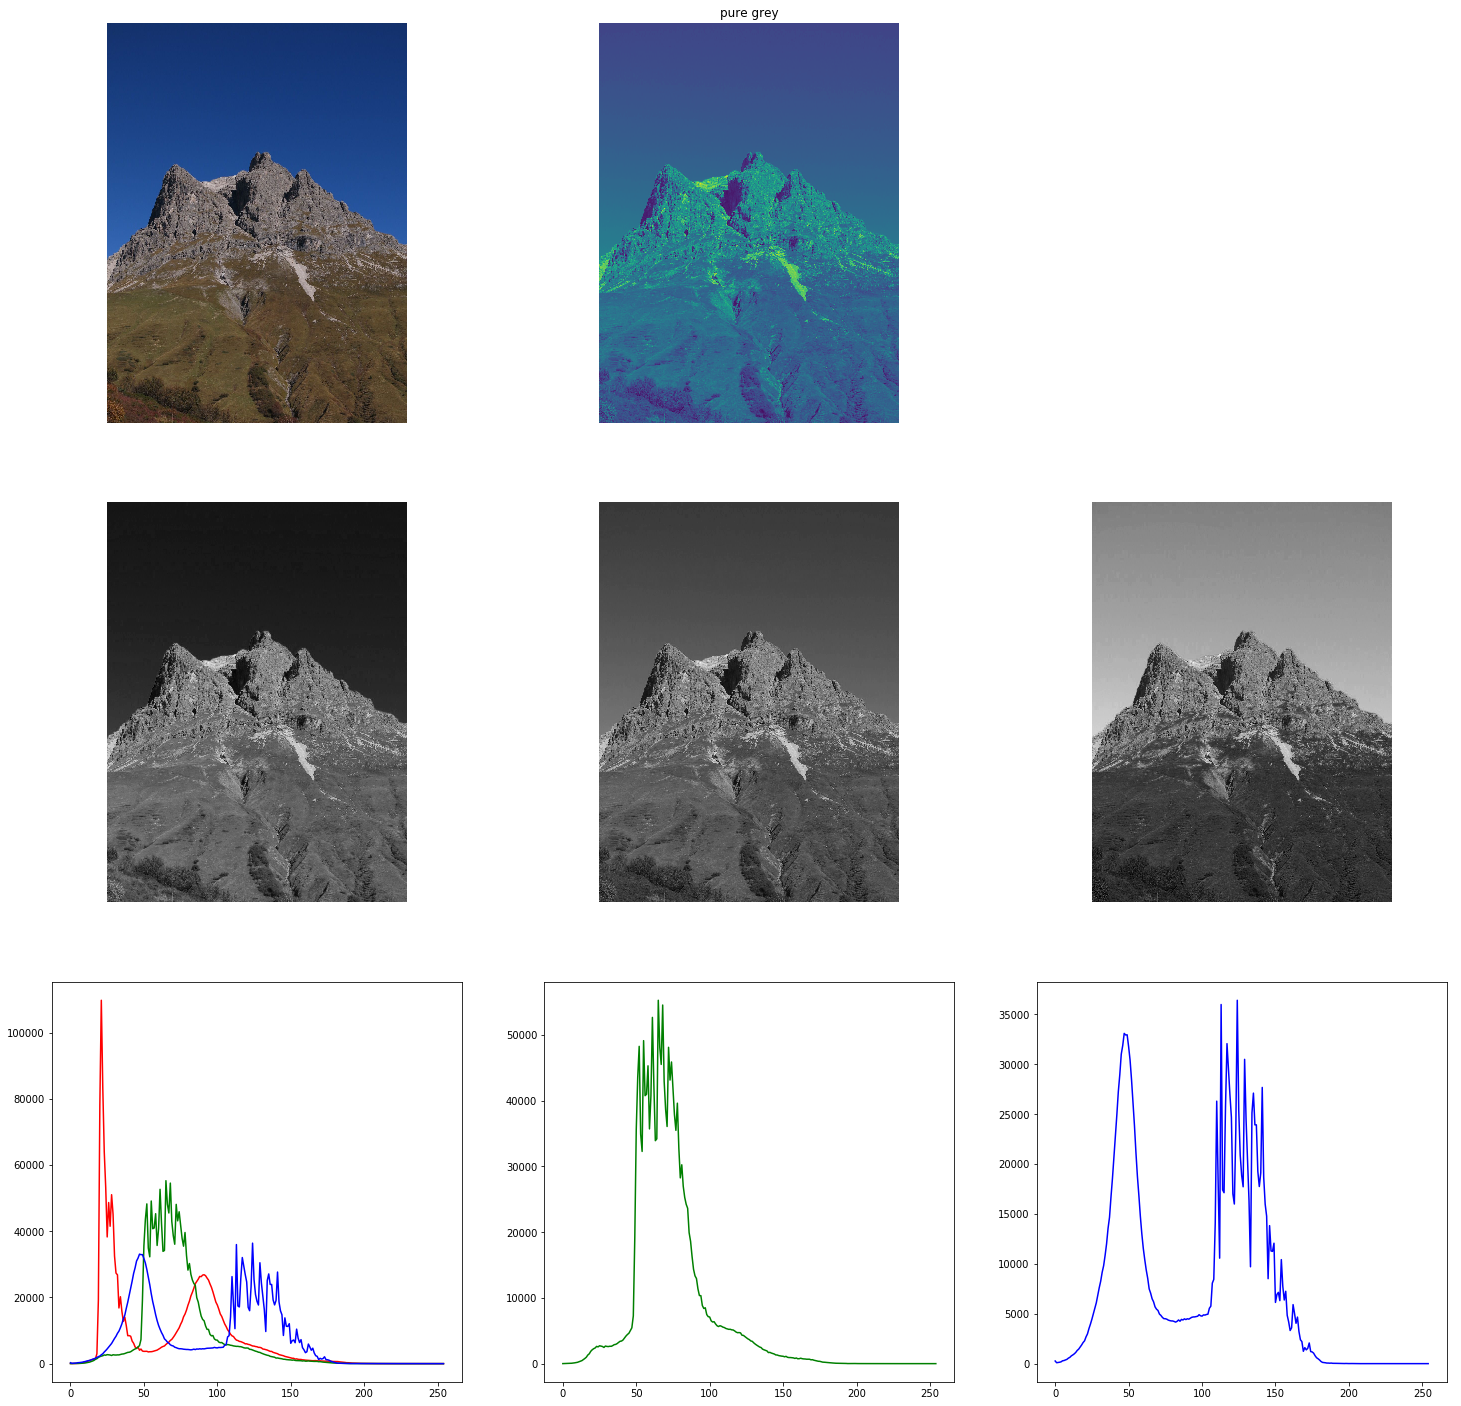

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 25), squeeze=True)

# display color image
axes[0, 0].imshow(imgRGB)
axes[0, 0].axis('off')
axes[0, 1].imshow(imgGrey, cmap='gray')
axes[0, 1].axis('off')
axes[0, 1].set_title('pure grey')
axes[0, 2].axis('off')

# display images as gray scale image for each color channel separately
axes[1, 0].imshow(imgRGB[:,:,0], cmap='gray')
axes[1, 0].axis('off')
axes[1, 1].imshow(imgRGB[:,:,1], cmap='gray')
axes[1, 1].axis('off')
axes[1, 2].imshow(imgRGB[:,:,2], cmap='gray')
axes[1, 2].axis('off')

# display histograms for each color channel
hist_r = cv.calcHist([imgRGB[:,:,0]], [0], None, [255], [0,255])
hist_g = cv.calcHist([imgRGB[:,:,1]], [0], None, [255], [0,255])
hist_b = cv.calcHist([imgRGB[:,:,2]], [0], None, [255], [0,255])
axes[2, 0].plot( hist_r, color='r')
axes[2, 0].plot( hist_g, color='g')
axes[2, 0].plot( hist_b, color='b')
axes[2, 0].axis('on')
axes[2, 1].plot(hist_g, color='g', label='green')
axes[2, 1].axis('on')
axes[2, 2].plot(hist_b, color='b', label='blue')
axes[2, 2].axis('on');
